In [1]:
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import requests
import gmaps
import os
import json
import time

#Import API Key
from api_keys import g_key

In [2]:
#the set the path
csv_path = "../Resources/country_vaccinations_clean.csv"

# Read our COVID data into pandas
covid_df = pd.read_csv(csv_path)
covid_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name
0,Albania,ALB,1/10/2021,0,0,0,0,0,0,0,0,0,Pfizer/BioNTech,Ministry of Health
1,Albania,ALB,1/11/2021,0,0,0,0,64,0,0,0,22,Pfizer/BioNTech,Ministry of Health
2,Albania,ALB,1/12/2021,128,128,0,0,64,0,0,0,22,Pfizer/BioNTech,Ministry of Health
3,Albania,ALB,1/13/2021,188,188,0,60,63,0,0,0,22,Pfizer/BioNTech,Ministry of Health
4,Albania,ALB,1/14/2021,266,266,0,78,66,0,0,0,23,Pfizer/BioNTech,Ministry of Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Wales,0,2/6/2021,592228,589622,2606,32760,26854,18,18,0,8517,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2912,Wales,0,2/7/2021,606768,603976,2792,14540,27089,19,19,0,8592,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2913,Wales,0,2/8/2021,632251,628760,3491,25483,27364,20,19,0,8679,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
2914,Wales,0,2/9/2021,659106,655419,3687,26855,27921,20,20,0,8856,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom


## Store Cleaned Data in DataFrame   

In [3]:
#Q1:  Total number of people fully vaccinated by country and ratios-daily  
#DF:  Country, Code, Date, People Fully Vaccinated, People Fully Vac/Hundred, add vaccine and source name
#Dict: Total number of people fully vaccinated - this is the number of people that received the entire set of immunization 
#according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
#Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
#Show covid_count() as part of understanding the data structure.  Show count and describe.
#Graph Type:  Bar Chart

#Check the number of countries 
country_count=covid_df["country"].value_counts()
country_count


England             60
Wales               60
United Kingdom      60
Northern Ireland    60
Scotland            60
                    ..
Algeria              2
Iran                 2
Saint Helena         1
Greenland            1
Liechtenstein        1
Name: country, Length: 85, dtype: int64

In [4]:
#List the sum of "people_fully_vaccinated" grouped by country
country_sum=covid_df.groupby(["country"]).sum()["people_fully_vaccinated"]
country_sum

country
Albania                       439
Algeria                         0
Andorra                         0
Argentina                 1912283
Austria                    703280
                          ...    
Turkey                          0
United Arab Emirates       250000
United Kingdom           15206782
United States           140464500
Wales                       32642
Name: people_fully_vaccinated, Length: 85, dtype: int64

In [5]:
#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries=covid_df[["country","people_fully_vaccinated"]].copy()
filtered_countries=filtered_countries[filtered_countries["people_fully_vaccinated"] !=0]

filtered_no_zero=filtered_countries.groupby(["country"]).sum()["people_fully_vaccinated"]
filtered_countries["country"].unique()


array(['Albania', 'Argentina', 'Austria', 'Belgium', 'Bermuda', 'Brazil',
       'Bulgaria', 'Canada', 'Cayman Islands', 'Chile', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'England', 'Estonia',
       'Faeroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar',
       'Greece', 'Guernsey', 'Hungary', 'Iceland', 'Indonesia', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Northern Ireland', 'Norway',
       'Oman', 'Poland', 'Portugal', 'Romania', 'Russia', 'Scotland',
       'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Wales'], dtype=object)

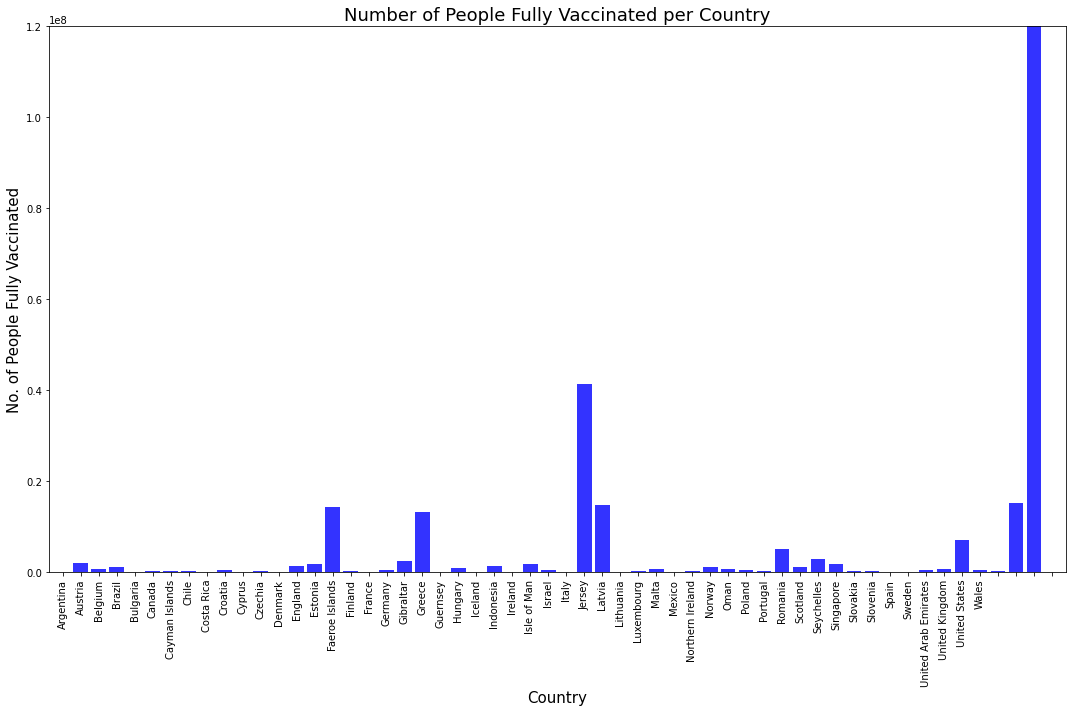

In [6]:
#Graph the results in a Bar Graph
x_axis=np.arange(len(filtered_no_zero))
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(x_axis, filtered_no_zero, color='b', alpha=0.8, align='center' )


#Set Data Frame column values as x-axis labels
tick_loc=[value for value in x_axis]

plt.xticks(tick_loc, ['Argentina', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Cayman Islands', 'Chile', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'England', 'Estonia', 'Faeroe Islands',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey',
       'Hungary', 'Iceland', 'Indonesia', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jersey', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Mexico', 'Northern Ireland', 'Norway', 'Oman', 'Poland',
       'Portugal', 'Romania', 'Scotland', 'Seychelles', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Wales'], rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)

#plt.ylim(0, max(filtered_no_zero)+10)
plt.ylim(0,120000000)

plt.xlabel("Country", fontsize=15)
plt.ylabel("No. of People Fully Vaccinated", fontsize=15)
plt.title("Number of People Fully Vaccinated per Country", fontsize=18)
plt.tight_layout()

In [7]:
#Create new DF that only contains country and people_fully_vaccinated_per_hundred columns and removes 0 from people_fully_vaccinated_per_hundred
filtered_countries_hun=covid_df[["country","people_fully_vaccinated_per_hundred"]].copy()
filtered_countries_hun=filtered_countries_hun[filtered_countries_hun["people_fully_vaccinated_per_hundred"] !=0]

filtered_no_zero_hun=filtered_countries_hun.groupby(["country"])["people_fully_vaccinated_per_hundred"].max()
#filtered_countries_hun["country"].unique()
filtered_no_zero_hun
#sort_df=pd.DataFrame(sort_hun)
#sort_df["country"].unique()

country
Austria                  1
Belgium                  1
Bermuda                  2
Cayman Islands           7
Croatia                  1
Cyprus                   1
Czechia                  1
Denmark                  2
Estonia                  1
Faeroe Islands           2
Finland                  1
Germany                  1
Gibraltar               20
Greece                   1
Hungary                  1
Iceland                  1
Ireland                  1
Isle of Man              3
Israel                  27
Italy                    2
Jersey                   3
Lithuania                1
Malta                    2
Northern Ireland         1
Norway                   1
Poland                   1
Portugal                 1
Romania                  1
Russia                   1
Serbia                   1
Seychelles              10
Slovakia                 1
Slovenia                 2
Spain                    2
Sweden                   1
United Arab Emirates     2
United States       

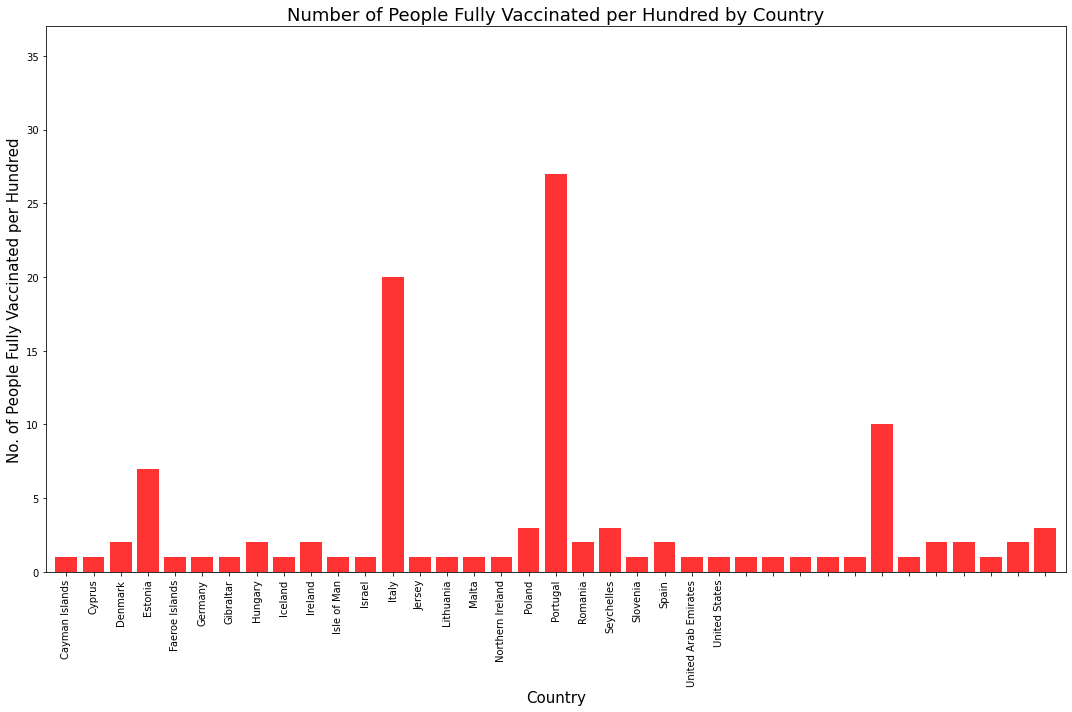

In [8]:
#Graph the results in a Bar Graph
x_axis=np.arange(len(filtered_no_zero_hun))
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(x_axis, filtered_no_zero_hun, color='r', alpha=0.8, align='center' )


#Set Data Frame column values as x-axis labels
tick_loc=[value for value in x_axis]

plt.xticks(tick_loc, ['Cayman Islands', 'Cyprus', 'Denmark', 'Estonia', 'Faeroe Islands',
       'Germany', 'Gibraltar', 'Hungary', 'Iceland', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Jersey', 'Lithuania', 'Malta',
       'Northern Ireland', 'Poland', 'Portugal', 'Romania', 'Seychelles',
       'Slovenia', 'Spain', 'United Arab Emirates', 'United States'], rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(filtered_no_zero_hun)+10)
#plt.ylim(0,120000000)

plt.xlabel("Country", fontsize=15)
plt.ylabel("No. of People Fully Vaccinated per Hundred", fontsize=15)
plt.title("Number of People Fully Vaccinated per Hundred by Country", fontsize=18)
plt.tight_layout()

In [9]:
#Q2: Which vaccines and mixes are being distributed most /least. 
#Create new DF that only contains country and people_fully_vaccinated columns and removes 0 from people_fully_vaccinated
filtered_countries_vac=covid_df[["country","people_fully_vaccinated","vaccines"]].copy()
filtered_countries_vac=filtered_countries_vac[filtered_countries_vac["people_fully_vaccinated"] !=0]

filtered_countries_vac["country"].unique()
filtered_countries_vac
#filtered_no_zero=filtered_countries_vac.groupby(["country"])["vaccines"].value_counts()
#filtered_no_zero
#vaccines_lst=filtered_countries_vac["vaccines"].unique()
#vaccines_lst

,country,people_fully_vaccinated,vaccines
23,Albania,1,Pfizer/BioNTech
30,Albania,438,Pfizer/BioNTech
72,Argentina,4394,Sputnik V
73,Argentina,16352,Sputnik V
74,Argentina,25146,Sputnik V
...,...,...,...
2911,Wales,2606,"Oxford/AstraZeneca, Pfizer/BioNTech"
2912,Wales,2792,"Oxford/AstraZeneca, Pfizer/BioNTech"
2913,Wales,3491,"Oxford/AstraZeneca, Pfizer/BioNTech"
2914,Wales,3687,"Oxford/AstraZeneca, Pfizer/BioNTech"


In [ ]:
#Graph the results

In [ ]:
#Q3:  Northern vs Southern Hemisphere-Identify global patterns or observations in regards to the vaccination types.
#DF
#Create Heat Map